### Importing Qiskit and visualization tools

In [1]:
# Importing qiskit dependencies
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [2]:
from qiskit import IBMQ
IBMQ.save_account('YOUR_API_TOKEN_HERE')

Credentials already present. Set overwrite=True to overwrite.


#### Importing the simulators

The circuits we build have to be run in some form of simulators, and for our purposes we will be using two simulators
Qasm Simulator: This is main simulator backend, it mimics the execution of a quantum circuit on a real quantum computer and returns the results. It can be configured to generate noise based on calibration parameters to emulate the actual device.
State Vector Simulator: This simulator executes the quantum circuit under "ideal conditions" and returns a quantum state vector at the end.


In [3]:
# Initializing qasm simulator to run the circuit and measure results
qasm_sim = Aer.get_backend('qasm_simulator')

# Initializing state vector simulator to visualize state vectors
statevector_sim = Aer.get_backend("statevector_simulator")

In [4]:
NO_OF_QUBITS = 2
NO_OF_CLASSICAL_BITS = 2

In [5]:
# Initializing a quantum circuit with 2 qubits and 2 classical bits
circuit = QuantumCircuit(QuantumRegister(NO_OF_QUBITS), ClassicalRegister(NO_OF_CLASSICAL_BITS))

# Drawing the circuit
circuit.draw()

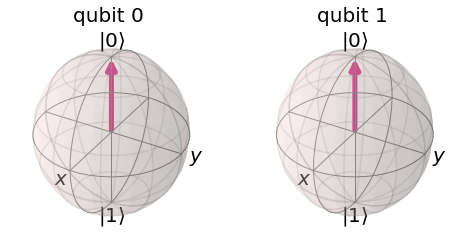

In [6]:
# BEFORE APPLYING GATES

# Executing the circuit on the statevector simulator 
statevec_job = execute(experiments=circuit, backend=statevector_sim)

# Grabbing results from the job
statevec_result = statevec_job.result()

# Plotting state vector
plot_bloch_multivector(statevec_result.get_statevector())

In [7]:
# Applying Hadamard(H) gate on the first qubit
circuit.h(0)

# Applying C-NOT gate such that the control qubit is 0 and target qubit is 1.
circuit.cx(0, 1)

# Drawing the circuit
circuit.draw()

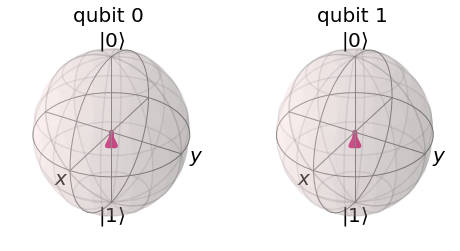

In [8]:
# AFTER APPLYING GATES

# Executing the circuit on the statevector simulator 
statevec_job = execute(experiments=circuit, backend=statevector_sim)

# Grabbing results from the job
statevec_result = statevec_job.result()

# Plotting state vector
plot_bloch_multivector(statevec_result.get_statevector())

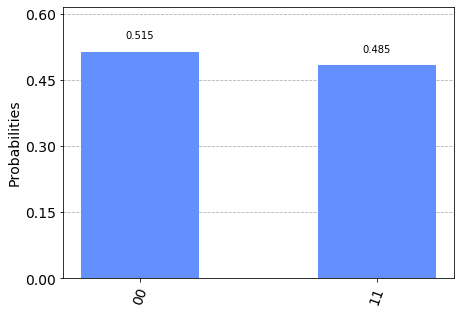

In [9]:
# Mapping the quantum measurement to classical bits
circuit.measure([0, 1], [0, 1]) 

# Executing the circuit on the qasm simulator
qasm_job = execute(experiments=circuit, backend=qasm_sim, shots=1024)

# Grabbing results from the job
qasm_result = qasm_job.result()

# Plotting a histogram on the resulting probabilities
# Notice how there's zero probability of 01 or 10 due to the qubits' entanglement
plot_histogram(qasm_result.get_counts())

## Running on the IBM Cloud

In [10]:
# Load the credentials to access the IBM Quantum Computers
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [11]:
# Input the hub name associated with your credential
provider = IBMQ.get_provider('ibm-q')

# You can get a list of available quantum computers on the IBM Quantum Experience Portal
# Pick one that has the lowest number of jobs in the queue
quantum_computer = provider.get_backend('ibmq_16_melbourne')

# Execute the circuit on a real quantum computer!
job = execute(experiments=circuit, backend=quantum_computer)

In [12]:
# Monitor the status of the job in real time
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run
